# Project

# Final Project - Analyzing Sales Data

**Date**: 30 December 2021

**Author**: Kasidis Satangmongkol (Toy DataRockie)

**Course**: `Pandas Foundation`

In [4]:
# import data
import pandas as pd
df = pd.read_csv("sample-store.csv")

In [5]:
# preview top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# shape of dataframe
df.shape

(9994, 21)

In [7]:
# see data frame information using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

We can use `pd.to_datetime()` function to convert columns 'Order Date' and 'Ship Date' to datetime.

In [8]:
# example of pd.to_datetime() function
pd.to_datetime(df['Order Date'].head(), format='%m/%d/%Y')

0 2019-11-08
1 2019-11-08
2 2019-06-12
3 2018-10-11
4 2018-10-11
Name: Order Date, dtype: datetime64[ns]

In [9]:
# TODO - convert order date and ship date to datetime in the original dataframe
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
print(df[['Order Date', 'Ship Date']].head())

  Order Date  Ship Date
0 2019-11-08 2019-11-11
1 2019-11-08 2019-11-11
2 2019-06-12 2019-06-16
3 2018-10-11 2018-10-18
4 2018-10-11 2018-10-18


In [10]:
# TODO - count nan in postal code column
nan_count = df['Postal Code'].isna().sum()
print("Number of NaN values in 'Postal Code' column:", nan_count)

Number of NaN values in 'Postal Code' column: 11


In [11]:
# TODO - filter rows with missing values
missing_rows = df[df.isna().any(axis=1)]
missing_rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2020-104066,2020-12-05,2020-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,2018-11-07,2018-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2019-150140,2019-04-06,2019-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


In [ ]:
# TODO - Explore this dataset on your owns, ask your own questions

## Data Analysis Part

Answer 10 below questions to get credit from this course. Write `pandas` code to find answers.

In [15]:
# TODO 01 - how many columns, rows in this dataset
rows, columns = df.shape
df.shape

(9994, 21)

In [18]:
# TODO 02 - is there any missing values?, if there is, which colunm? how many nan values?
missing_values = df.isna().sum()

missing_values[missing_values > 0]

Postal Code 11
dtype: int64

In [20]:
# TODO 03 - your friend ask for `California` data, filter it and export csv for him
df_california = df[df['State'] == 'California']
df_california.to_csv('california_data.csv', index=False)

In [24]:
# TODO 04 - your friend ask for all order data in `California` and `Texas` in 2017 (look at Order Date), send him csv file
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date']
filtered_df = df[
    (df['State'].isin(['California', 'Texas'])) &
    (df['Order Date'].dt.year == 2017)]
filtered_df.to_csv('california_texas_2017_orders.csv', index=False)

In [29]:
# TODO 05 - how much total sales, average sales, and standard deviation of sales your company make in 2017
df['Order Date'] = pd.to_datetime(df['Order Date'])
df_2017 = df[df['Order Date'].dt.year == 2017]
total_sales = df_2017['Sales'].sum()
average_sales = df_2017['Sales'].mean()
std_sales = df_2017['Sales'].std()
print("Total Sales:", total_sales)
print("Average Sales:", average_sales)
print("Standard Deviation of Sales:", std_sales)

Total Sales: 484247.4981
Average Sales: 242.97415860511794
Standard Deviation of Sales: 754.0533572593683


In [34]:
# TODO 06 - which Segment has the highest profit in 2018
df_2018 = df[df['Order Date'].dt.year == 2018]
result = df_2018.groupby('Segment')['Profit'].sum()
highest_profit_segment = result.sort_values(ascending=False)
highest_profit_segment

Segment
Consumer 28460.1665
Corporate 20688.3248
Home Office 12470.1124
Name: Profit, dtype: float64

In [39]:
# TODO 07 - which top 5 States have the least total sales between 15 April 2019 - 31 December 2019
df['Order Date'] = pd.to_datetime(df['Order Date'])
filtered = df[(df['Order Date'] >= '2019-04-15') & (df['Order Date'] <= '2019-12-31')]
States_less_total = filtered.groupby('State')['Sales'].sum().sort_values().head(5)
print("5 states with lowest sales (Apr 15 - Dec 31, 2019):")
print(States_less_total)

5 states with lowest sales (Apr 15 - Dec 31, 2019):
State
New Hampshire            49.05
New Mexico               64.08
District of Columbia    117.07
Louisiana               249.80
South Carolina          502.48
Name: Sales, dtype: float64


In [42]:
# TODO 08 - what is the proportion of total sales (%) in West + Central in 2019 e.g. 25%
df_2019 = df[df['Order Date'].dt.year == 2019]
total_sales = df_2019['Sales'].sum()
west_central_sales = df_2019[df_2019['Region'].isin(['West', 'Central'])]['Sales'].sum()
proportion = (west_central_sales / total_sales) * 100
print(f"Proportion of West + Central regions in 2019: {proportion:.2f}%")

Proportion of West + Central regions in 2019: 54.97%


In [48]:
# TODO 09 - find top 10 popular products in terms of number of orders vs. total sales during 2019-2020
df = df[df['Order Date'].dt.year.isin([2019, 2020])]
order_counts = df.groupby('Product Name')['Order ID'].nunique().reset_index()
order_counts.columns = ['Product Name', 'Order Count']
sales = df.groupby('Product Name')['Sales'].sum().reset_index()
result = pd.merge(order_counts, sales, on='Product Name')
# Get top 10 by orders
print("Top 10 by number of orders:")
print(result.sort_values('Order Count', ascending=False).head(10))
# Get top 10 by sales
print("\nTop 10 by total sales:")
print(result.sort_values('Sales', ascending=False).head(10))

Top 10 by number of orders:
                                         Product Name  Order Count     Sales
512                                 Easy-staple paper           27  1481.728
1412                                          Staples           24   462.068
1406                                  Staple envelope           22   644.936
1413                          Staples in misc. colors           13   357.164
1409                                   Staple remover           12   204.512
1421                          Storex Dura Pro Binders           12   176.418
411                Chromcraft Round Conference Tables           12  7965.053
732   Global Wood Trimmed Manager's Task Chair, Khaki           11  2793.086
250                           Avery Non-Stick Binders           11   122.128
1410                       Staple-based wall hangings           10   233.392

Top 10 by total sales:
                                           Product Name  Order Count  \
388               Canon image

<Axes: ylabel='Frequency'>

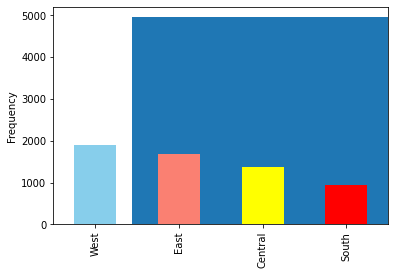

In [50]:
# TODO 10 - plot at least 2 plots, any plot you think interesting :)
df["Sales"].plot(kind="hist", bins=50)

df['Region'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'yellow', 'red'])

In [54]:
# TODO Bonus - use np.where() to create new column in dataframe to help you answer your own questions
import numpy as np
df['Profit_Status'] = np.where(df['Profit'] > 200, 'Profitable', 'Unprofitable')
status_count = df['Profit_Status'].value_counts()
print("Number of profitable vs unprofitable transactions:")
print(status_count)

Number of profitable vs unprofitable transactions:
Unprofitable    5652
Profitable       247
Name: Profit_Status, dtype: int64
